In [1]:
import pickle
with open('gt_test_extended.pkl', 'rb') as f:
    gt_groups = pickle.load(f)
with open('pred_test_extended.pkl', 'rb') as f:
    pred_groups = pickle.load(f)

Median group size: 20


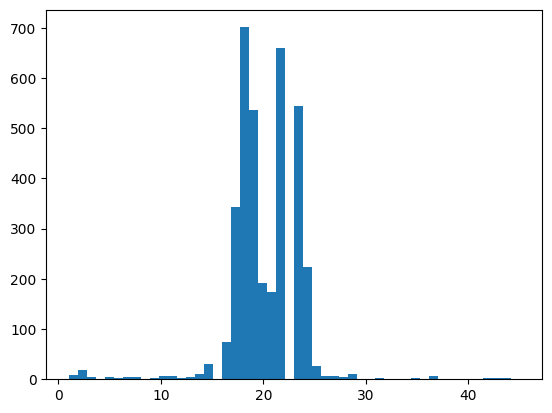

In [2]:
from matplotlib import pyplot as plt
plt.hist([len(g) for g in gt_groups], bins=50)
import numpy as np
median_length = int(np.median([len(g) for g in gt_groups]))
print(f"Median group size: {median_length}")


In [3]:
def group_len(g, border=True):
    return len([1 for m in g if border or not m['is_border']])
def group_matches(g, border=True):
    return sum(m['is_matched'] for m in g if border or not m['is_border'])
def calculate_integrated_precision(pred_groups, int_thr, border=True):
    matches = len([1 for g in pred_groups if group_matches(g, border) > 0 and group_len(g, border) >= int_thr])
    total = len([1 for g in pred_groups if group_len(g, border) >= int_thr])
    return matches / total

def calculate_integrated_recall(gt_groups, int_thr, border=True):
    matches = len([1 for g in gt_groups if group_matches(g, border) >= int_thr])
    total = len(gt_groups)
    return matches / total

In [4]:
def find_best_int_thr(border : bool):
    thresholds = range(1, median_length + 1)
    precisions = []
    recalls    = []
    f1_scores  = []

    for threshold in thresholds:
        precision = calculate_integrated_precision(pred_groups, threshold, border)
        recall = calculate_integrated_recall(gt_groups, threshold, border)
        f1 = 2 * (precision * recall) / (precision + recall)

        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, f1_scores, marker='o', label='F1 Score')
    plt.plot(thresholds, precisions, marker='s', label='Precision')
    plt.plot(thresholds, recalls, marker='^', label='Recall')
    plt.xlabel('Integration Threshold')
    plt.ylabel('Score')
    plt.title(f'Metrics vs Integration Threshold (Border: {border})')
    plt.legend()
    plt.grid(True)
    plt.show()

    max_f1 = max(f1_scores)
    max_f1_threshold = thresholds[f1_scores.index(max_f1)]
    print(f"Max F1: {max_f1:.3f} at threshold {max_f1_threshold}")

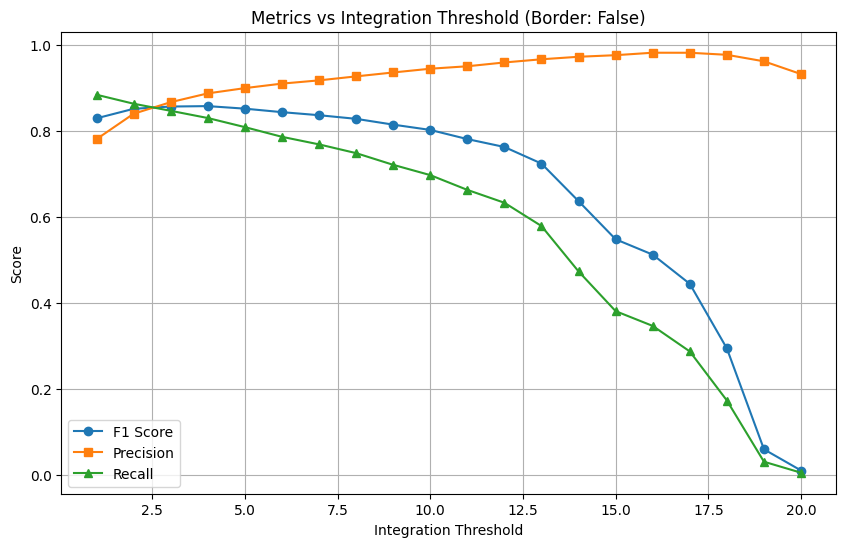

Max F1: 0.857 at threshold 4


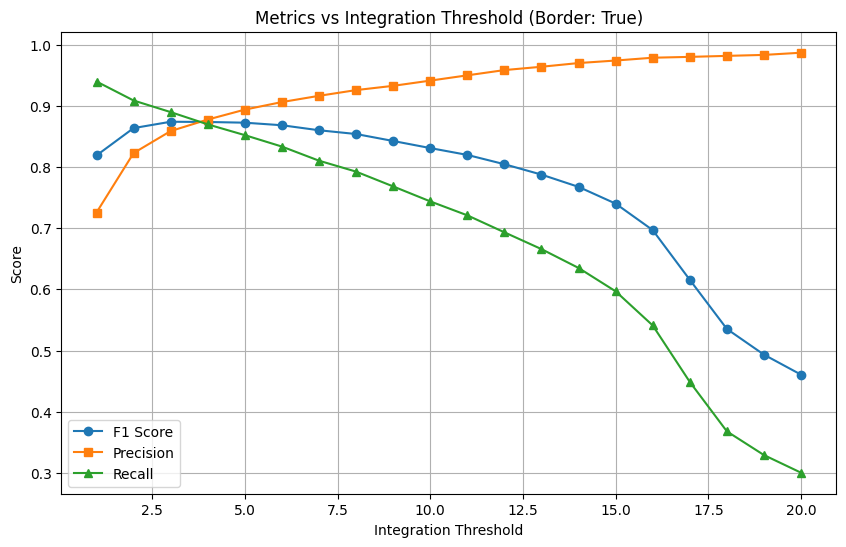

Max F1: 0.874 at threshold 3


In [5]:
find_best_int_thr(border=False)
find_best_int_thr(border=True)

In [6]:
def calculate_integrated_groups(pred_groups, int_thr, border=True):
    matches = len([1 for g in pred_groups if group_matches(g, border) > 0 and group_len(g, border) >= int_thr])
    total = len([1 for g in pred_groups if group_len(g, border) >= int_thr])
    return matches / total

In [7]:
def get_border_conflicts(int_thr): 
    border_match = set(i for i, g in enumerate(pred_groups) if group_matches(g) > 0 and group_len(g) >= int_thr)
    nonborder_non_match = set(j for j, g in enumerate(pred_groups) if not(group_matches(g, False) > 0 and group_len(g, False) >= int_thr))
    return [g for i, g in enumerate(pred_groups) if i in border_match.intersection(nonborder_non_match)]

In [8]:
conflicts = get_border_conflicts(1)

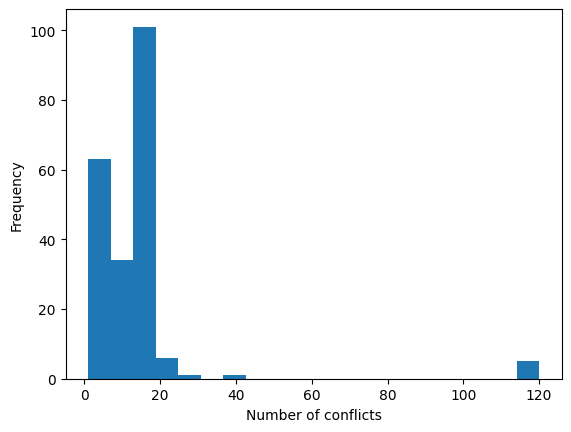

In [ ]:
plt.hist([len(g) for g in conflicts], bins=20)
plt.xlabel('Number of conflicts')
plt.ylabel('Frequency')
plt.show()

In [10]:
iidx = 0
gidx = 0

In [11]:
import sys
sys.path.append('../utils')
sys.path.append('..')

%matplotlib inline
import cv2
from matplotlib import pyplot as plt
from utils.interpolate.markup_utils import vis_markup

for instance in conflicts[gidx][iidx:iidx+1]:
    print(instance['is_matched'], instance['is_border'], instance['img'])
    img = cv2.imread(instance['img'])
    img = vis_markup(img, [instance['obj']])
    fig, axs = plt.subplots(1, 2, figsize=(15, 7))
    axs[0].set_title('Ground truth')
    axs[0].axis('off')
    axs[0].imshow(img)
iidx += 1
plt.show()

False True runs/segment/predict/tula_sep_0002_2024_07_22_18_03_39_400.jpg


[ WARN:0@0.023] global loadsave.cpp:268 findDecoder imread_('runs/segment/predict/tula_sep_0002_2024_07_22_18_03_39_400.jpg'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'copy'